<a href="https://colab.research.google.com/github/gorniakowski/fast_ai/blob/master/duster_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Czołem. W dzisiejszym odcinku zrobimy prostą ACHTUNG ! AI.

W zasadzie jest to przeróbka pracy tych gości:
Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)

Najsampierw storzyć musim kolekcje danych, coby głab uczyć miał się z czego.

## A lista linków potrzebna jest

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button. Then continue scrolling until you cannot scroll anymore. The maximum number of images Google Images shows is 700.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [1]:
!pip install git+https://github.com/fastai/fastai.git
from fastai import *
from fastai.vision import *
from google.colab import files

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-drhezw8r
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-drhezw8r
  Stored in directory: /tmp/pip-ephem-wheel-cache-xl03pqak/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai


Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [28]:
folder = 'duster'
file = 'duster.txt'
path = Path('data/images/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
files.upload()

Saving duster.txt to duster.txt


{'duster.txt': b'https://ocdn.eu/pulscms-transforms/1/LNMk9kqTURBXy8wNDhiNjA1MmUzYTk2ZjNlMjk1MzEyMmFiZjgyOGZmYS5qcGVnkpUCzQMUAMLDlQIAzQL4wsOBoTAB\nhttps://upload.wikimedia.org/wikipedia/commons/c/c9/2018_Dacia_Duster.jpg\nhttps://www.cdn.daciagroup.com/content/dam/Dacia/master/vehicles/duster/hjd-duster/duster-ph1/overview/dacia-duster-design-004.jpg.ximg.l_full_m.smart.jpg\nhttps://www.cdn.daciagroup.com/content/dam/Dacia/UK/Personal-Cars/All-new%20Duster/dacia-duster-essential-new.jpg.ximg.l_full_m.smart.jpg\nhttps://apollo-ireland.akamaized.net/v1/files/eyJmbiI6Im15OGNoZXh4OWJlYi1PVE9NT1RPUEwifQ.7Utq_wr0BlR4Y74DkXPpnC4OBSnkaQLdUzp0L_7of5U/image;s=1080x720;cars_;/855981250_;slot=14;filename=eyJmbiI6Im15OGNoZXh4OWJlYi1PVE9NT1RPUEwifQ.7Utq+wr0BlR4Y74DkXPpnC4OBSnkaQLdUzp0L+7of5U_rev001.jpg\nhttps://b.allegroimg.com/s512/03be19/2064d12148458ed40c621dfa92eb/NOWA-DACIA-DUSTER-1-6-PRESTIGE-ORANGE-ATACAMA\nhttps://www.cdn.daciagroup.com/content/dam/Dacia/PL/vehicles/duster/nowy-duster/specif

In [16]:
folder1 = 'cars'
file1 = 'cars.txt'
path1 = Path('data/images/')
dest1 = path1/folder1
dest1.mkdir(parents=True, exist_ok=True)
files.upload()

{}

You will need to run this line once per each category.

In [29]:
!ls
!mv cars.txt data/images/cars
!mv duster.txt data/images/duster

data  duster.txt  sample_data
mv: cannot stat 'cars.txt': No such file or directory


Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![](https://github.com/fastai/course-v3/blob/sagemaker-ebs-volume/nbs/dl1/images/download_images/upload.png?raw=1)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images than can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [34]:
download_images(path/folder/file, dest, max_pics=200)
#download_images(path1/folder1/file1, dest1, max_pics=200)

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fbe6628cc88>>
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fbe6628cc88>>
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fbe6628cc88>>
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fbe6628cc88>>
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fbe6628cc88>>
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fbe6628cc88>>
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tor

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

Error https://superauto24.com/files/temp/cars-galmed-40894/1526995499_642_441_1.jpg HTTPSConnectionPool(host='superauto24.com', port=443): Max retries exceeded with url: /files/temp/cars-galmed-40894/1526995499_642_441_1.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://superauto24.com/files/temp/cars-galmed-39968/1524657295_642_441_1.jpg HTTPSConnectionPool(host='superauto24.com', port=443): Max retries exceeded with url: /files/temp/cars-galmed-39968/1524657295_642_441_1.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error x-raw-image:///6074bd6035e174060dd8b92edfd75e58ce70cc6a560215cdcaa620187d4a7274 No connection adapters were found for 'x-raw-image:///6074bd6035e174060dd8b92edfd75e58ce70cc6a560215cdcaa620187d4a7274'


Good! Let's take a look at some of our pictures then.

In [0]:
classes = ['duster','cars']

In [36]:
global_path = Path('data/images')
for c in classes:
    print(c)
    verify_images(global_path/c, delete=True, max_workers=8)

duster


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/images/duster/00000027.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/duster/00000008.jpg'>
cars


In [35]:
!ls data/images/duster

00000000.jpg   00000041.jpg   00000082.jpeg  00000122.jpg   00000162.jpg
00000001.jpg   00000042.jpg   00000083.jpg   00000123.jpg   00000163.jpg
00000002.jpg   00000043.jpg   00000084.jpg   00000124.jpg   00000164.jpg
00000003.jpg   00000044.jpg   00000085.jpg   00000125.jpg   00000165.jpg
00000004.jpg   00000045.jpg   00000086.jpg   00000126.jpg   00000166.jpg
00000005.jpg   00000046.jpg   00000087.jpg   00000127.jpg   00000167.jpg
00000006.jpg   00000047.jpg   00000088.jpg   00000128.jpg   00000168.jpg
00000007.jpg   00000048.jpg   00000089.jpg   00000129.jpg   00000169.jpg
00000008.jpg   00000049.jpeg  00000090.jpg   00000130.jpg   00000170.jpg
00000009.jpg   00000050.jpg   00000091.jpg   00000131.jpg   00000171.jpg
00000010.jpg   00000051.jpg   00000092.jpg   00000132.axd   00000172.jpg
00000011.jpg   00000052.jpg   00000093.jpg   00000133.jpg   00000173.jpg
00000012.jpg   00000053.jpg   00000094.jpg   00000134.jpg   00000174.jpg
00000013.jpg   00000054.jpg   00000095.jpg   000001

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder('data/images', train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [38]:
data.classes

['cars', 'duster']

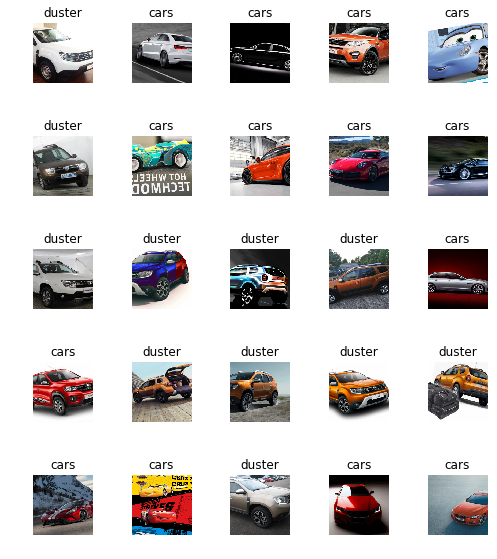

In [39]:
data.show_batch(rows=5, figsize=(7,8))

In [40]:
data.classes, data.c

(['cars', 'duster'], 2)

## Train model

In [41]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 111222485.62it/s]


In [42]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.772565,0.388384,0.105263,00:22
1,0.523089,0.271402,0.105263,00:19
2,0.440246,0.245633,0.105263,00:20
3,0.385787,0.243133,0.092105,00:19


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


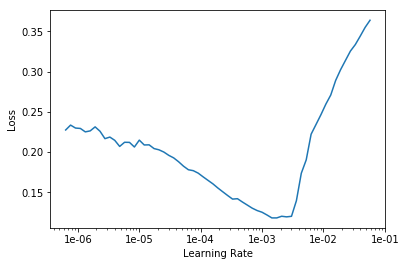

In [46]:
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.434601,7008.988281,0.552632,00:18
1,2.318447,105.526878,0.552632,00:20


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.plot_top_losses(2)